# `Project Description:`
# `Melanoma Detection Assignment`

**Author:** Tandeep Sandhu

## `Project details`

### `Building a multiclass classification model using a custom convolutional neural network in TensorFlow.`

### `Problem statement:`

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### `Dataset:`

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

* Actinic keratosis
* Basal cell carcinoma
* Dermatofibroma
* Melanoma
* Nevus
* Pigmented benign keratosis
* Seborrheic keratosis
* Squamous cell carcinoma
* Vascular lesion

### `Domain:`
- Medical



### `Project Pipeline:`

#### Data Reading/Data Understanding
- Defining the path for train and test images

#### Dataset Creation
- Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.

#### Dataset visualisation
- Create a code to visualize one instance of all the nine classes present in the dataset

#### Model Building & training
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training.
- Train the model for ~20 epochs.
- Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.

#### Chose an appropriate data augmentation strategy to resolve underfitting/overfitting

#### Model Building & training on the augmented data
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training
- Train the model for ~20 epochs
- Write your findings after the model fit, see if the earlier issue is resolved or not?

#### Class distribution
- Examine the current class distribution in the training dataset
- Which class has the least number of samples?
- Which classes dominate the data in terms of the proportionate number of samples?

#### Handling class imbalances
- Rectify class imbalances present in the training dataset with Augmentor library.

#### Model Building & training on the rectified class imbalance data
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training
- Train the model for ~30 epochs
- Write your findings after the model fit, see if the issues are resolved or not?

## Import the libraries, dataset and visualize data

### Import all the important libraries

In [1]:
# import the libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# convert to one-hot-encoding
from tensorflow.keras.utils import to_categorical

from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
# check the versions of some libraries
np.__version__

'1.25.2'

In [3]:
# check the versions of some libraries
pd.__version__

'2.0.3'

In [4]:
# check the versions of some libraries
tf.__version__

'2.15.0'

In [5]:
# print the number of GPUs available for running
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
# get the GPU information from Google Colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Apr  7 13:57:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              23W / 300W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
# check the runtime available from Google Colab
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


### Import the dataset

In [8]:
# mount the google drive so the files can be imported and stored
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
# Defining the path for train and test images
# Please update the path based on where the train and test dataset is stored
root_path = '/content/gdrive/MyDrive/Colab Notebooks/cnn/images'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [10]:
# path where the train dataset is stored
data_dir_train

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train')

In [11]:
# path where the test dataset is stored
data_dir_test

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/cnn/images/Test')

In [12]:
# get the number of images available
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [13]:
# load the datset using the image processor from keras
# define the parameters to be used for loading
batch_size = 32
img_height = 180
img_width = 180

In [14]:
# train dataset
# load the train dataset using keras.preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [15]:
# validation dataset
# load the valiudation dataset using keras.preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [16]:
# get the names of the classes using dataset.class_names
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [17]:
# to check the names of the file paths using dataset.file_paths
# only to check if issue with the file path
# val_ds.file_paths

In [18]:
# test dataset
# load the test dataset using keras.preprocessing
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [19]:
# print the class names for the train dataset
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [20]:
# print the class names for the validation dataset
class_names = val_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [21]:
# print the class names for the test dataset
class_names = test_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

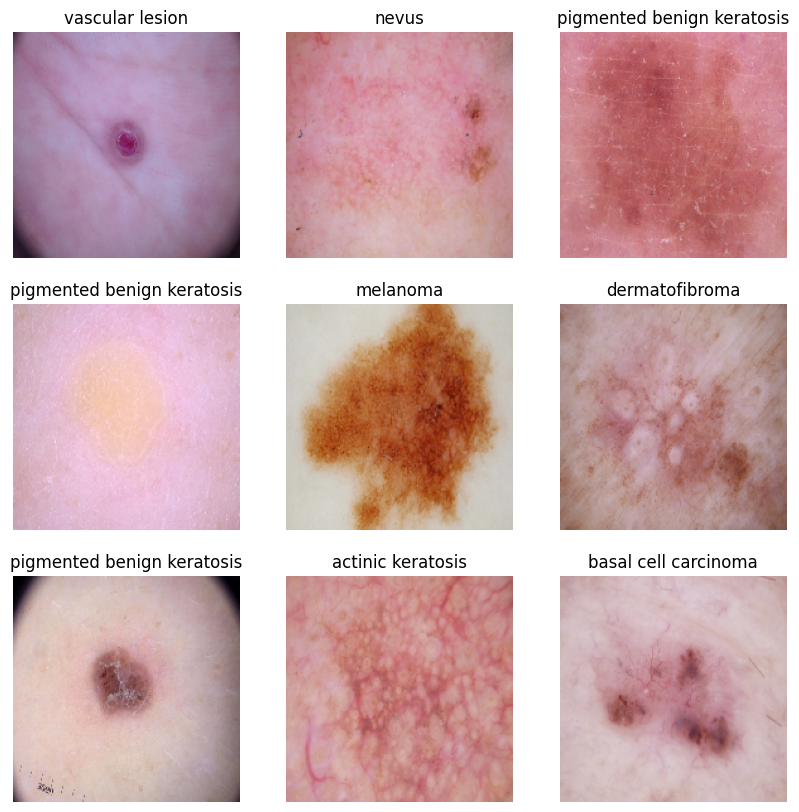

In [22]:
# plot the train dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

- The different images as per class have been displayed

In [23]:
# tf.data builds a performance model of the input pipeline and runs an optimization algorithm
# to find a good allocation of its CPU budget across all parameters specified as AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## CNN model without changing any images


### Create the model



In [24]:
# parameters for the model
input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

In [25]:
# define the model having two convolutional layer followed by max pooling
# add two more convolutional layer and then the normal layers to flatten and perform the categorization

model = Sequential()

# Scaling layer
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
# Convolution layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Max Pool of size 2*2
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolution layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# Max Pool of size 2*2
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolution layer with 128 filters
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# Max Pool of size 2*2
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
#model.add(Activation('sigmoid'))
model.add(Dense(9,activation='softmax'))

In [26]:
# get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 86, 86, 64)        256       
 Normalization)                                         

In [27]:
# compile the model
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
# define the epochs and batch size
epochs = 20
batch_size = 32

In [29]:
# fit the model
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 74s 307ms/step - loss: 14.7786 - accuracy: 0.2048 - val_loss: 4.0183 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 7.7349 - accuracy: 0.2232 - val_loss: 2.3508 - val_accuracy: 0.2237
Epoch 3/20
56/56 [==============================] - 1s 26ms/step - loss: 4.0153 - accuracy: 0.2372 - val_loss: 2.7986 - val_accuracy: 0.2215
Epoch 4/20
56/56 [==============================] - 1s 25ms/step - loss: 2.8048 - accuracy: 0.2573 - val_loss: 3.5786 - val_accuracy: 0.2215
Epoch 5/20
56/56 [==============================] - 1s 25ms/step - loss: 2.2077 - accuracy: 0.2974 - val_loss: 2.7157 - val_accuracy: 0.2081
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 2.0289 - accuracy: 0.3376 - val_loss: 3.9934 - val_accuracy: 0.2081
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.9711 - accuracy: 0.3739 - val_loss: 7.6639 - val_accuracy: 0.1924
Epoch 8/20

**The accuary of the model on training and validation dataset is not quite good. We will need to see other options to improve the model performance**

### Visualizing results

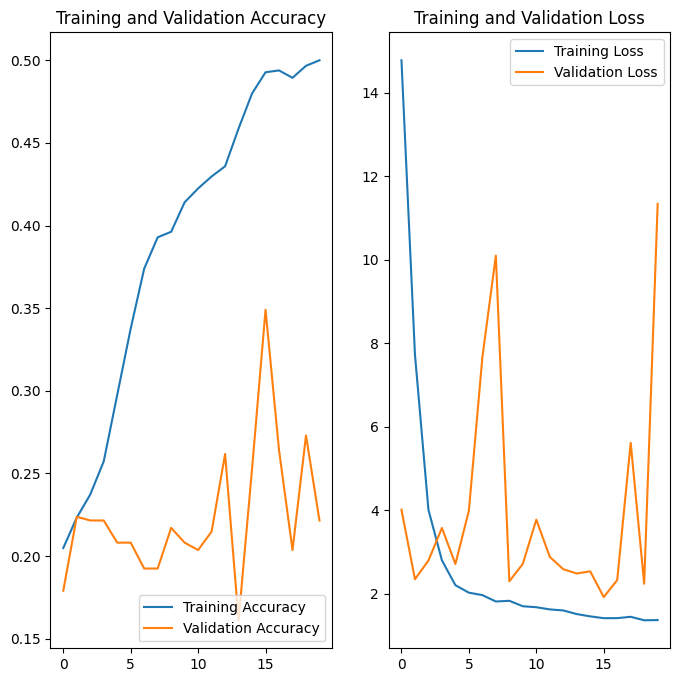

In [30]:
# build a graph to visualize the training dataset
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
# check the performance of the model
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 0s 9ms/step - loss: 11.3407 - accuracy: 0.2215
Accuracy:  0.2120535671710968
Validation Accuracy:  0.2214765101671219
Loss:  10.602530479431152
Validation Loss 11.340705871582031


- **The accuary of the model on training and validation dataset is not quite good.**
- The scores are close but the overall accuracy value is low.
- We will need to see other options to improve the model performance using data augementation

1/1 [==============================] - 0s 229ms/step
Actual Class: basal cell carcinoma
Predictive Class: melanoma


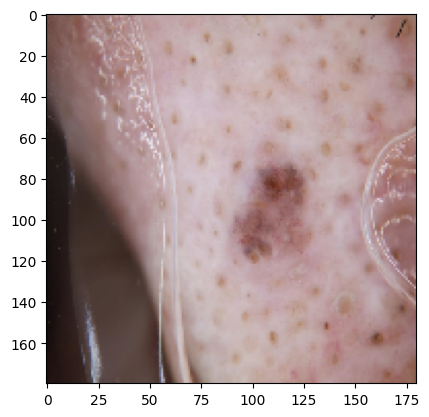

In [32]:
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[1]}" + '\n' + "Predictive Class: " + pred_class)

- The model could not predict the right class

## CNN model with changing parameters of the images

### Perform the data augmentation

**Use the data augmentation appproach to improve the performance of the model**

In [33]:
# use data augementation approach to generalize the images by making various changes
# this will perform random changes to the image parameters
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        validation_split=0.2)
image_class = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis',
               'squamous cell carcinoma', 'vascular lesion']


In [34]:
# build the train dataset with updated images
train_batches = datagen.flow_from_directory(data_dir_train,
    target_size = (180,180),
    classes = image_class,
    batch_size = 32,
    subset='training'
 )

Found 1795 images belonging to 9 classes.


In [35]:
# build the validation dataset with updated images
valid_batches = datagen.flow_from_directory(data_dir_train,
    target_size = (180,180),
    classes = image_class,
    batch_size = 32,
    subset='validation'
)

Found 444 images belonging to 9 classes.


In [36]:
# get the classes from the validation dataset
valid_batches.class_indices

{'actinic keratosis': 0,
 'basal cell carcinoma': 1,
 'dermatofibroma': 2,
 'melanoma': 3,
 'nevus': 4,
 'pigmented benign keratosis': 5,
 'seborrheic keratosis': 6,
 'squamous cell carcinoma': 7,
 'vascular lesion': 8}

In [37]:
# get the total samples in the validation dataset
sample_count = valid_batches.samples
sample_count

444

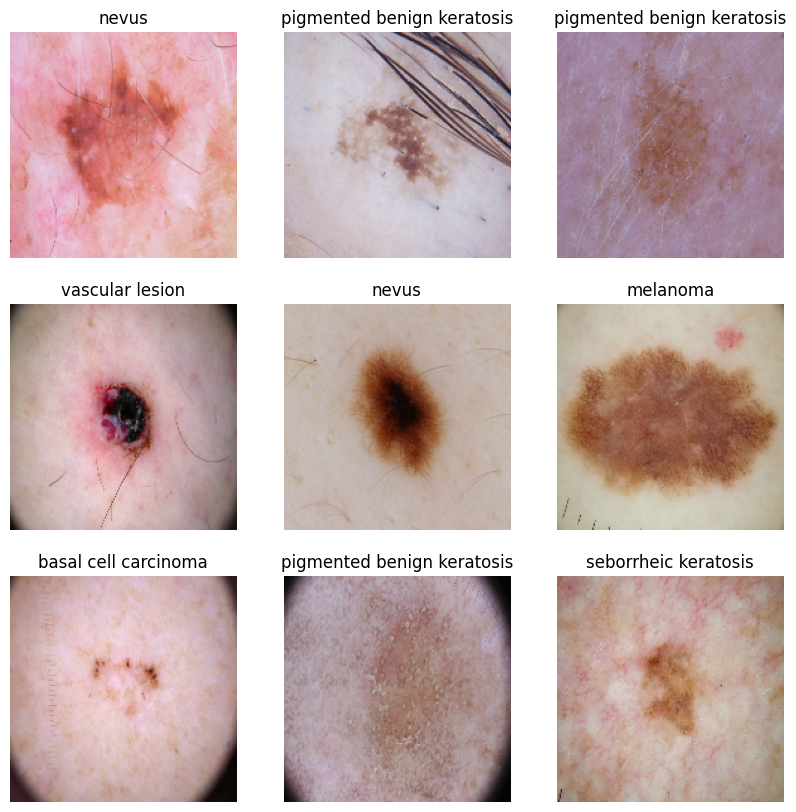

In [38]:
# visualize the augmentation strategy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Create the model

In [39]:
# define the model

model = Sequential()

# Scaling layer
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
# Convolution layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
# Max Pool of size 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout Layer
model.add(Dropout(0.25))

# Convolution layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
# Max Pool of size 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout Layer
model.add(Dropout(0.4))

# Convolution layer with 128 filters
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Max Pool of size 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout Layer
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

In [40]:
# get the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

In [41]:
# complile the model

optimizer = 'adam'
loss_fn = "binary_crossentropy"

model.compile(loss=loss_fn,
                  optimizer=optimizer,
                  metrics=['accuracy']
              )

In [42]:
# set a learning rate annealing
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

In [43]:
# set the parameters for the model
epochs = 20
batch_size = 10

In [44]:
# fil the model on the training dataset
history = model.fit(
  train_batches,
  epochs = epochs,
  verbose = 1,
  validation_data=valid_batches,
  callbacks=[learning_rate_reduction]
)

Epoch 1/20
57/57 [==============================] - 41s 651ms/step - loss: 0.3711 - accuracy: 0.1850 - val_loss: 0.4258 - val_accuracy: 0.1959 - lr: 0.0010
Epoch 2/20
57/57 [==============================] - 37s 656ms/step - loss: 0.3270 - accuracy: 0.2440 - val_loss: 0.3234 - val_accuracy: 0.2928 - lr: 0.0010
Epoch 3/20
57/57 [==============================] - 37s 651ms/step - loss: 0.2988 - accuracy: 0.3504 - val_loss: 0.3035 - val_accuracy: 0.3378 - lr: 0.0010
Epoch 4/20
57/57 [==============================] - 37s 646ms/step - loss: 0.2901 - accuracy: 0.3900 - val_loss: 0.3155 - val_accuracy: 0.3446 - lr: 0.0010
Epoch 5/20
57/57 [==============================] - 37s 646ms/step - loss: 0.2878 - accuracy: 0.3794 - val_loss: 0.3080 - val_accuracy: 0.3626 - lr: 0.0010
Epoch 6/20
57/57 [==============================] - 37s 644ms/step - loss: 0.2785 - accuracy: 0.3933 - val_loss: 0.3343 - val_accuracy: 0.3378 - lr: 0.0010
Epoch 7/20
57/57 [==============================] - 36s 639ms/st

### Visualizing results

<built-in method keys of dict object at 0x7a5cc46b6380> :


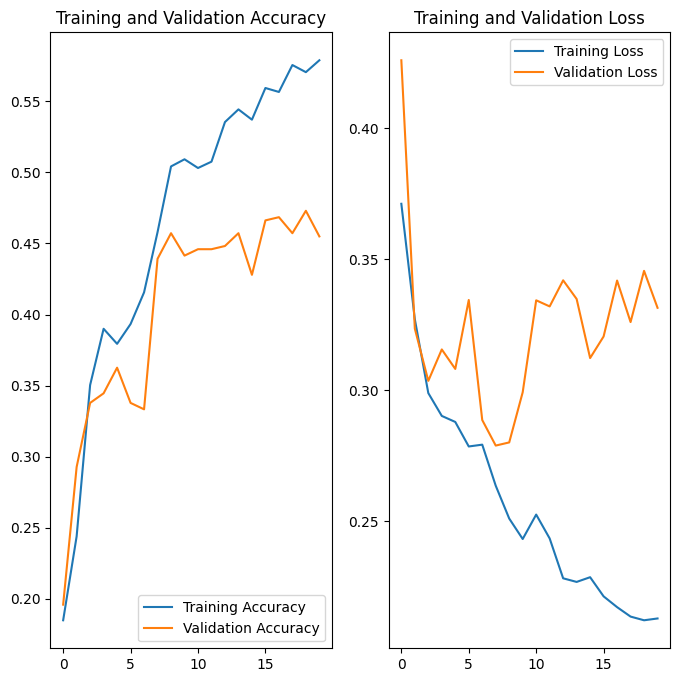

In [45]:
# build the plot for the model performance
acc = history.history['accuracy']
print(history.history.keys, ":")
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
# check the performance of the model
loss, accuracy = model.evaluate(train_batches, verbose=1,)
loss_v, accuracy_v = model.evaluate(valid_batches, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 8s 575ms/step - loss: 0.3068 - accuracy: 0.4550
Accuracy:  0.582172691822052
Validation Accuracy:  0.45495495200157166
Loss:  0.20698295533657074
Validation Loss 0.3068067729473114


- **The performance of the model has improved compared to previous model.**
- This means that the image augementation has helped.
- This approach of data augementation didn't help much with the loss score.

1/1 [==============================] - 0s 221ms/step
Actual Class: basal cell carcinoma
Predictive Class: pigmented benign keratosis


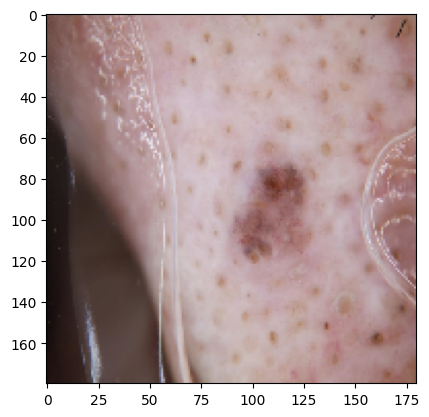

In [47]:
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[1]}" + '\n' + "Predictive Class: " + pred_class)

- Even after an improved score we can see that the  model could not predict the right class.
- This means the model is overfitting.

## CNN Model with images created by Augementor

### Explore the data to understand class imbalance

***Plot the distribution of classes in the training dataset***

In [48]:
# get the number of images in each classes
accumulator = []
for i in range(len(class_names)):
  name= class_names[i]
  number = len(list(data_dir_train.glob(f'{class_names[i]}/*.jpg')))
  accumulator.append({'class':name,'number':number})

accumulator

[{'class': 'actinic keratosis', 'number': 114},
 {'class': 'basal cell carcinoma', 'number': 376},
 {'class': 'dermatofibroma', 'number': 95},
 {'class': 'melanoma', 'number': 438},
 {'class': 'nevus', 'number': 357},
 {'class': 'pigmented benign keratosis', 'number': 462},
 {'class': 'seborrheic keratosis', 'number': 77},
 {'class': 'squamous cell carcinoma', 'number': 181},
 {'class': 'vascular lesion', 'number': 139}]

In [49]:
# build the dataframe
class_diff = pd.DataFrame(accumulator, columns=['class', 'number'])

In [50]:
# display in table form
class_diff

,class,number
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


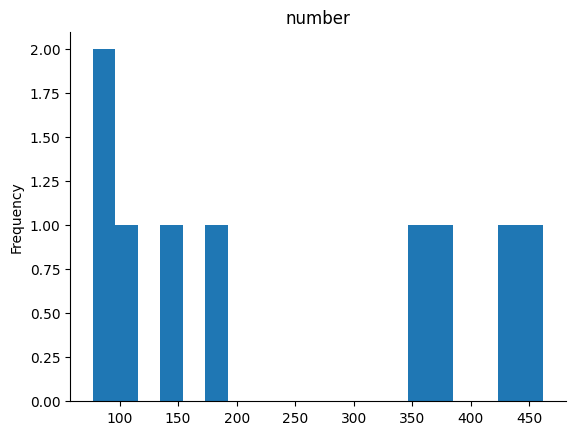

In [51]:
# plot a bar graph showing the class spread
from matplotlib import pyplot as plt
class_diff['number'].plot(kind='hist', bins=20, title='number')
plt.gca().spines[['top', 'right',]].set_visible(False)

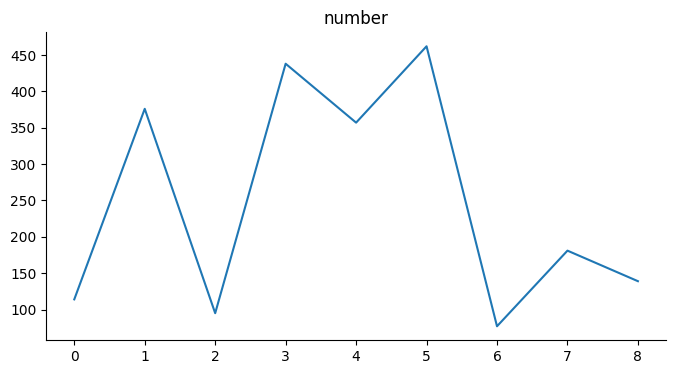

In [52]:
# plot a graph showing the class spread
from matplotlib import pyplot as plt
class_diff['number'].plot(kind='line', figsize=(8, 4), title='number')
plt.gca().spines[['top', 'right']].set_visible(False)

<Figure size 1000x1000 with 0 Axes>

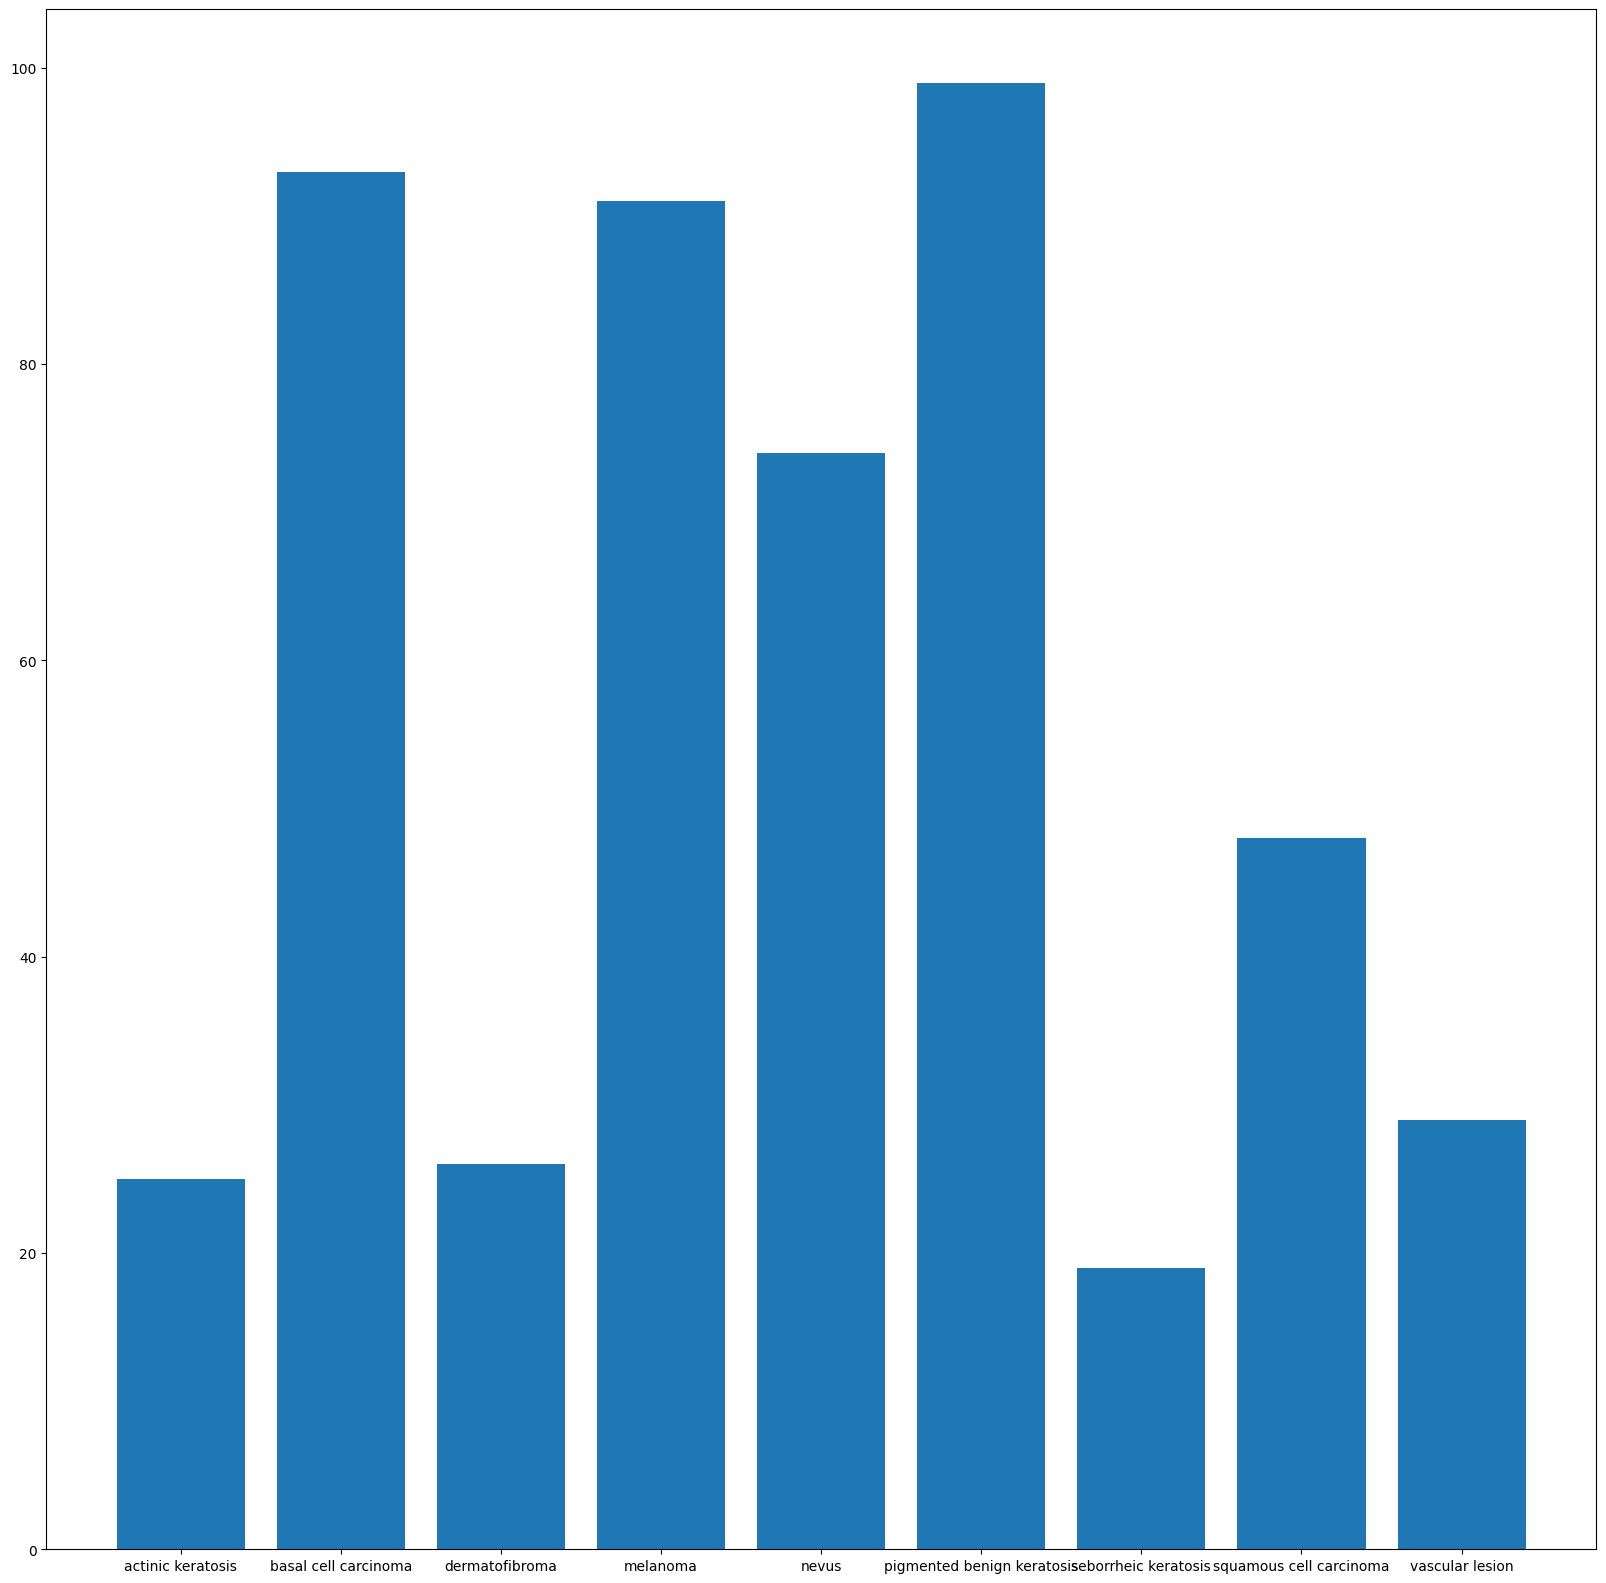

In [53]:
# plot a graph showing number of classes count
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i])

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

**Pigmented benign keratosis dominates the data in the training dataset. Approach will be to use another data augementation based on the python package `Augementor`.**

### Build the model with images created by Augementor

In [54]:
# install the Augmentor package
!pip install Augmentor

In [55]:
# define a constant for the path where training data is stored
path_to_training_dataset='/content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/'

In [56]:
# check the constant value
path_to_training_dataset

'/content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/'

In [57]:
# check the traing dataset location
data_dir_train

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train')

In [58]:
# use Augementor to add images
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5CA05B0310>: 100%|██████████| 500/500 [00:05<00:00, 85.06 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5CA0543490>: 100%|██████████| 500/500 [00:06<00:00, 73.78 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5CA0655840>: 100%|██████████| 500/500 [00:05<00:00, 94.37 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7A5CC4574CD0>: 100%|██████████| 500/500 [00:20<00:00, 24.12 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7A5CC4672D40>: 100%|██████████| 500/500 [00:21<00:00, 23.44 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5CF026E8F0>: 100%|██████████| 500/500 [00:05<00:00, 91.55 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A5CC45D93F0>: 100%|██████████| 500/500 [00:09<00:00, 52.65 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A5CA05F4C40>: 100%|██████████| 500/500 [00:05<00:00, 93.38 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A5CC4786C20>: 100%|██████████| 500/500 [00:06<00:00, 80.05 Samples/s]


In [59]:
# check the number of original images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [60]:
# define a constant for the path to check one class
data_dir_train_class1 = pathlib.Path(root_path + '/Train/actinic keratosis')

In [61]:
# print the path to check one class
data_dir_train_class1

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/cnn/images/Train/actinic keratosis')

In [62]:
# get the count for the images creayed for one class by Augementor
image_count_train = len(list(data_dir_train_class1.glob('*/*.jpg')))
print(image_count_train)

500


In [63]:
# total number of images created by Augementor
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Distribution of augmented data after adding new images to the original training data.

In [64]:
# distribution of images in each classes
accumulator = []
for i in range(len(class_names)):
  name= class_names[i]
  number = len(list(data_dir_train.glob(f'{class_names[i]}/**/*.jpg')))
  accumulator.append({'class':name,'number':number})

accumulator

[{'class': 'actinic keratosis', 'number': 614},
 {'class': 'basal cell carcinoma', 'number': 876},
 {'class': 'dermatofibroma', 'number': 595},
 {'class': 'melanoma', 'number': 938},
 {'class': 'nevus', 'number': 857},
 {'class': 'pigmented benign keratosis', 'number': 962},
 {'class': 'seborrheic keratosis', 'number': 577},
 {'class': 'squamous cell carcinoma', 'number': 681},
 {'class': 'vascular lesion', 'number': 639}]

In [65]:
# print the total number of images by class
# this includes orginal and Augementor created
class_diff_new = pd.DataFrame(accumulator, columns=['class', 'number'])
class_diff_new

,class,number
0,actinic keratosis,614
1,basal cell carcinoma,876
2,dermatofibroma,595
3,melanoma,938
4,nevus,857
5,pigmented benign keratosis,962
6,seborrheic keratosis,577
7,squamous cell carcinoma,681
8,vascular lesion,639


In [66]:
# define the path for the location where the Augementor images are stored
list_path = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [67]:
# build a list
list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
list_data= dict(zip(list_path, list_new))
list_df= pd.DataFrame(list(list_data.items()),columns = ['Path','Label'])

In [68]:
# number of images createdin varios class using the Augementor
list_df['Label'].value_counts()

Label
melanoma                      500
squamous cell carcinoma       500
nevus                         500
basal cell carcinoma          500
seborrheic keratosis          500
pigmented benign keratosis    500
actinic keratosis             500
vascular lesion               500
dermatofibroma                500
Name: count, dtype: int64

**As we can see that now the class are balanced which should improve the model performance.**

### Train the model on the data created using Augmentor

In [69]:
# define the parameters for the image samples
batch_size = 32
img_height = 180
img_width = 180

In [70]:
# create the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [71]:
# create the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [72]:
# define the model

model = Sequential()

# Scaling of data
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
# Convolution layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
# Max Pool of size 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
# Batch normalization layer
model.add(BatchNormalization())
# Dropout Layer
model.add(Dropout(0.25))

# Convolution layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
# Max Pool of size 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
# Batch normalization layer
model.add(BatchNormalization())
# Dropout Layer
model.add(Dropout(0.4))

# Convolution layer with 128 filters
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Batch normalization layer
model.add(BatchNormalization())
# Max Pool of size 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout Layer
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

In [73]:
# print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 90, 90, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 90, 90, 32)       

In [74]:
# complile the model

optimizer = 'adam'
loss_fn = "binary_crossentropy"

model.compile(loss=loss_fn,
                  optimizer=optimizer,
                  metrics=['accuracy']
              )

In [75]:
# train the model
epochs = 30

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

batch_size = 10
history = model.fit(
    train_ds,
    epochs = epochs,
    verbose = 1,
    validation_data=val_ds ,
    callbacks=[learning_rate_reduction]
    )

Epoch 1/30
169/169 [==============================] - 25s 116ms/step - loss: -11.1594 - accuracy: 0.1337 - val_loss: -263.2129 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 2/30
169/169 [==============================] - 19s 111ms/step - loss: -65.2096 - accuracy: 0.1337 - val_loss: -227.2464 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 3/30
169/169 [==============================] - 19s 108ms/step - loss: -174.5052 - accuracy: 0.1337 - val_loss: -1282.0618 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 4/30
168/169 [============================>.] - ETA: 0s - loss: -344.7765 - accuracy: 0.1334
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
169/169 [==============================] - 19s 108ms/step - loss: -344.6541 - accuracy: 0.1337 - val_loss: -709.8658 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 5/30
169/169 [==============================] - 19s 108ms/step - loss: -519.9789 - accuracy: 0.1337 - val_loss: -833.2793 - val_accuracy: 0.1151 - lr: 5.0000e-04
Epoch 6/30
16

### Visualizing results

In [76]:
# check the performance of the model
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 4s 71ms/step - loss: -1687.2825 - accuracy: 0.1151
Accuracy:  0.1337166130542755
Validation Accuracy:  0.11507052928209305
Loss:  -1687.43994140625
Validation Loss -1687.282470703125


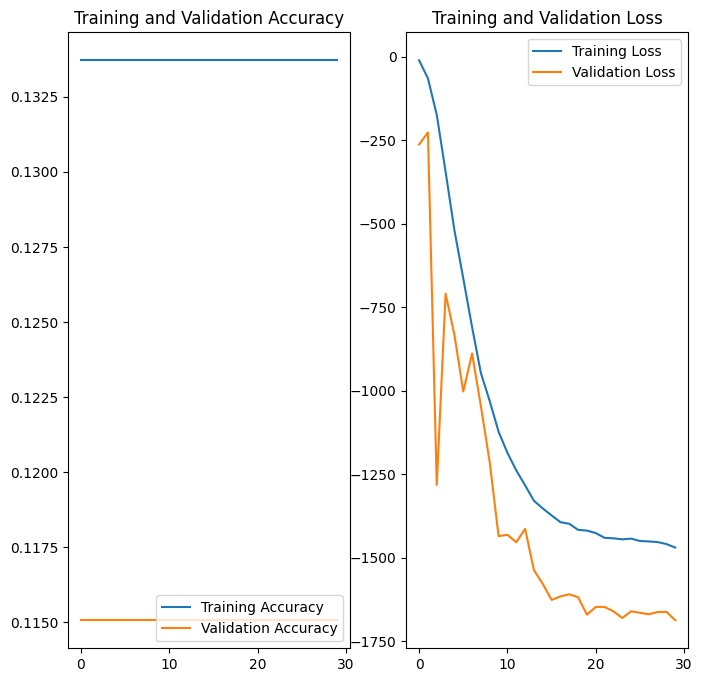

In [77]:
# visualize the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- **The accuary of the model on training and validation dataset extremely low which means the model will not perform.**
- The scores are close but the overall accuracy value is lowest compared to all the previous models.
- We will need to see other options to improve the model performance using data augementation or try different CNN architecture

1/1 [==============================] - 0s 134ms/step
Actual Class: basal cell carcinoma
Predictive Class: actinic keratosis


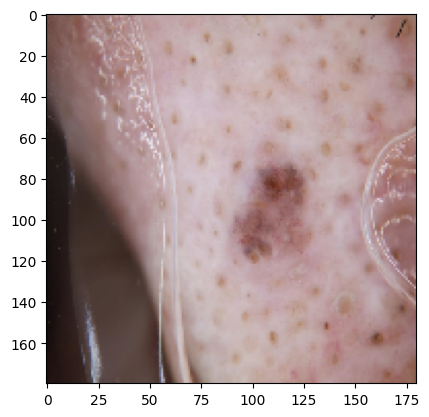

In [78]:
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[1]}" + '\n' + "Predictive Class: " + pred_class)

- We can also see that the model was not able to predict the right class.
- Since the accuracy of the model is so low, this would make sense.

### Build a model with a different CNN architecture

In [79]:
# build a model with different architecture to increase the accuracy

model = Sequential()
# Scaling of data
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
# Convolution layer with 32 filters
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# Max Pool of size 2*2
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Convolution layer with 64 filters
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# Max Pool of size 2*2
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Convolution layer with 128 filters
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
# Max Pool of size 2*2
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Convolution layer with 256 filters
model.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
# Max Pool of size 2*2
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Dropout Layer
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names),activation='softmax'))

In [80]:
# print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 41, 41, 128)      

In [81]:
# compile the model
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [82]:
# fit the model
# increase the number of epochs to improve accuracy
# this could also cause the model to overfit
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/50
169/169 [==============================] - 22s 109ms/step - loss: 2.1384 - accuracy: 0.1703 - val_loss: 1.9600 - val_accuracy: 0.2442 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 18s 105ms/step - loss: 1.9169 - accuracy: 0.2355 - val_loss: 1.8307 - val_accuracy: 0.2903 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 19s 106ms/step - loss: 1.8043 - accuracy: 0.2836 - val_loss: 1.7808 - val_accuracy: 0.3304 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 18s 105ms/step - loss: 1.6681 - accuracy: 0.3470 - val_loss: 1.5798 - val_accuracy: 0.4016 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 19s 107ms/step - loss: 1.5696 - accuracy: 0.3989 - val_loss: 1.4460 - val_accuracy: 0.4306 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 19s 107ms/step - loss: 1.4801 - accuracy: 0.4173 - val_loss: 1.4975 - val_accuracy: 0.4321 - lr: 0.0010
Epoch 7/50
169/169 [==============================] 

In [83]:
# check the performance of the model
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 4s 69ms/step - loss: 0.4723 - accuracy: 0.8463
Accuracy:  0.9285979270935059
Validation Accuracy:  0.846325159072876
Loss:  0.1878289431333542
Validation Loss 0.47233349084854126


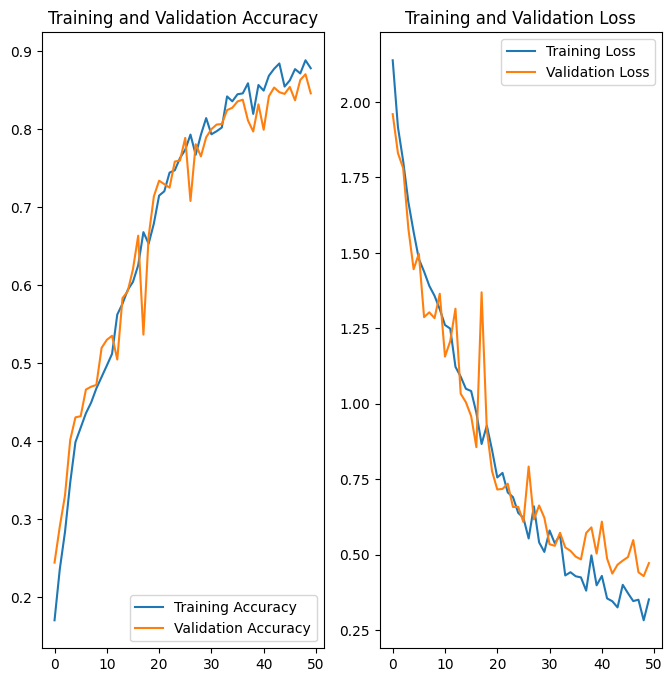

In [84]:
# visualize the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***Test the model***

1/1 [==============================] - 0s 159ms/step
Actual Class: basal cell carcinoma
Predictive Class: pigmented benign keratosis


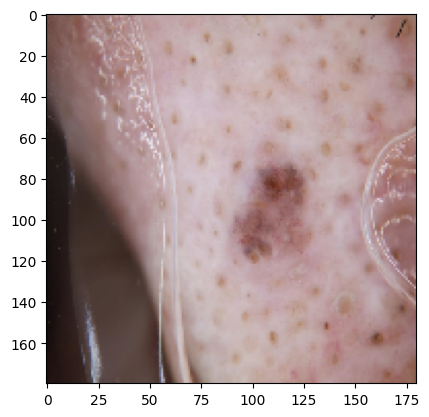

In [85]:
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[1]}" + '\n' + "Predictive Class: " + pred_class)

- **The accuary of the model on training and validation dataset has improved compared to previous models.**
- This means that higher number of epochs helped the model to better learn the weights and biases.
- The updated CNN architecture appears to have helped in the accuracy score.
- **Even after improvenet in accuracy score the model has not been able to predict the right class.**
- This means the model is overfitting
- WE can see that data augementation and different types of CNN architecture can improve the accuracy and possible reduce overfitting
- Other CNN architeture and data augementation approaches could be used to get better results.
- Due to the high GPU resources and time requirement for processing each CNN model, it would not be possible to build further optmized models.